In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
import numpy as np
import re

import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
from keras.layers.normalization import BatchNormalization

Using TensorFlow backend.


In [31]:
data = pd.read_csv("./train_data.csv", sep=",")
result = pd.read_csv("./result_data.csv", sep=",")
data = data.sort_values('race_id',ascending=False)
result = result.sort_values('race_id',ascending=False)
odds_1 = pd.read_csv('./cleaned_race_data.csv', sep=",")

In [32]:
data_train, data_test =train_test_split(data, test_size=0.2, random_state=0)
result_train, result_test =train_test_split(result, test_size=0.2, random_state=0)

In [33]:
odds_1 = pd.merge(result_test,odds_1,on="race_id")

In [34]:
result_test.head(5)

,race_id,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
41182,201906050406,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
16644,201208040301,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1058,200806030703,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
30198,201604030606,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
8783,201002010706,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [35]:
odds_1.head(5)

,race_id,1,2,3,4,5,6,7,8,9,...,where_racecourse_新潟,where_racecourse_札幌,where_racecourse_東京,where_racecourse_福島,where_racecourse_阪神,ground_type_ダ,ground_type_芝,left_right_straight_右,left_right_straight_左,left_right_straight_直線
0,201906050406,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,1,0,0
1,201208040301,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,1,0,0
2,200806030703,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
3,201604030606,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,1,0
4,201002010706,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0


In [36]:
odds = odds_1["tansyo"]
horse_number_first = odds_1["horse_number_first"]

In [37]:
data_train.drop(['race_id'], axis=1, inplace=True)
data_test.drop(['race_id'], axis=1, inplace=True)
result_train.drop(['race_id'], axis=1, inplace=True)
result_test.drop(['race_id'], axis=1, inplace=True)

In [38]:
data_train.loc[:,:] = scaler.fit_transform(data_train)
data_test.loc[:,:] = scaler.fit_transform(data_test)
result_train.loc[:,:] = scaler.fit_transform(result_train)
result_test.loc[:,:] = scaler.fit_transform(result_test)

In [8]:
data_train.shape

(33028, 2309)

In [9]:
result_train.shape

(33028, 18)

In [10]:
data_test.shape

(8257, 2309)

In [12]:
model = Sequential()
model.add(Dense(2309, activation='relu', input_dim=2309))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(BatchNormalization())
model.add(Dense(18, activation='softmax'))

adam = Adam()
model.compile(loss='categorical_crossentropy',
              optimizer=adam,
              metrics=['accuracy'])

history = model.fit(data_train, result_train, epochs=1000, batch_size=2024, validation_split=0.1)



25 [==============================] - 14s 463us/step - loss: 0.7455 - accuracy: 0.7362 - val_loss: 14.7111 - val_accuracy: 0.0763
Epoch 872/1000
29725/29725 [==============================] - 14s 463us/step - loss: 0.7481 - accuracy: 0.7394 - val_loss: 16.2703 - val_accuracy: 0.0799
Epoch 873/1000
29725/29725 [==============================] - 14s 463us/step - loss: 0.7435 - accuracy: 0.7393 - val_loss: 15.0320 - val_accuracy: 0.0751
Epoch 874/1000
29725/29725 [==============================] - 14s 459us/step - loss: 0.7397 - accuracy: 0.7417 - val_loss: 15.8995 - val_accuracy: 0.0802
Epoch 875/1000
29725/29725 [==============================] - 14s 466us/step - loss: 0.7420 - accuracy: 0.7427 - val_loss: 15.6502 - val_accuracy: 0.0742
Epoch 876/1000
29725/29725 [==============================] - 14s 464us/step - loss: 0.7518 - accuracy: 0.7396 - val_loss: 15.9396 - val_accuracy: 0.0742
Epoch 877/1000
29725/29725 [==============================] - 14s 466us/step - loss: 0.7696 - accura

In [51]:
loss, accuracy = model.evaluate(data_test, result_test, verbose=1)

8257/8257 [==============================] - 5s 556us/step


In [53]:
print(loss)
print(accuracy)

17.916161091229206
0.07121230661869049


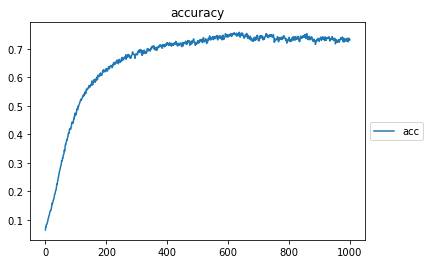

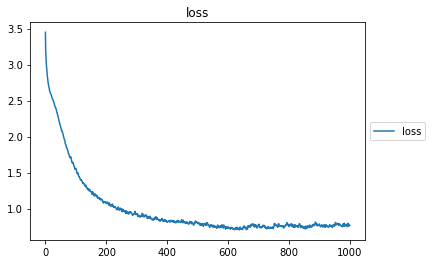

In [20]:
x = range(1000)
plt.plot(x, history.history['accuracy'], label="acc")
plt.title("accuracy")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

plt.plot(x, history.history['loss'], label="loss")
plt.title("loss")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()


In [58]:
model.save_weights('model.h5')
open('and.json',"w").write(model.to_json())

3036

In [56]:
count = 0
prize_money_sum = 0
buy_num = 0
number_of_times = 8257
for i in range(number_of_times):
  odd = odds[i:i+1].values
  horse_number = horse_number_first[i:i+1].values
  x=data_test[i:i+1]
  classes = model.predict_classes(x, batch_size=1)
  prob = model.predict_proba(x, batch_size=1)
  pred_num = classes[0]
  prob_1 = prob[0][pred_num]
  if prob_1 > 0.9:
    buy_num += 1
    if horse_number[0] == pred_num:
      prize_money_sum += int(re.sub("\\D", "",odd[0]))
      count+=1
print("的中率")
print((count/buy_num)*100)
print("回収率")
print((prize_money_sum/(buy_num*100))*100)
print(buy_num)

的中率
6.205079060852898
回収率
75.73790129372304
4174
